# Graficos usando datos sobre Pokemon

En este parte vamos a usar datos sobre el juego de pokemon
Los pokemons tinen diferentes atributos, son de direntes tipos (roca, planta, fuego, etc), 
ademas tienen diferentes cantidades en sus valores como: ataque, defensa, velocidad, etc
~~~~
> pkm<-read.csv("
https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")
> write.csv(pkm, file = "data/pkm.csv")
~~~~

In [2]:
pkm <- read.csv(file = "data/pkm.csv")

In [3]:
head(pkm)

,X,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
5,5,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
6,6,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False


In [4]:
library(dplyr)
library(ggplot2)
library(viridis)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [5]:
pkm2 <- pkm[, 7:12]

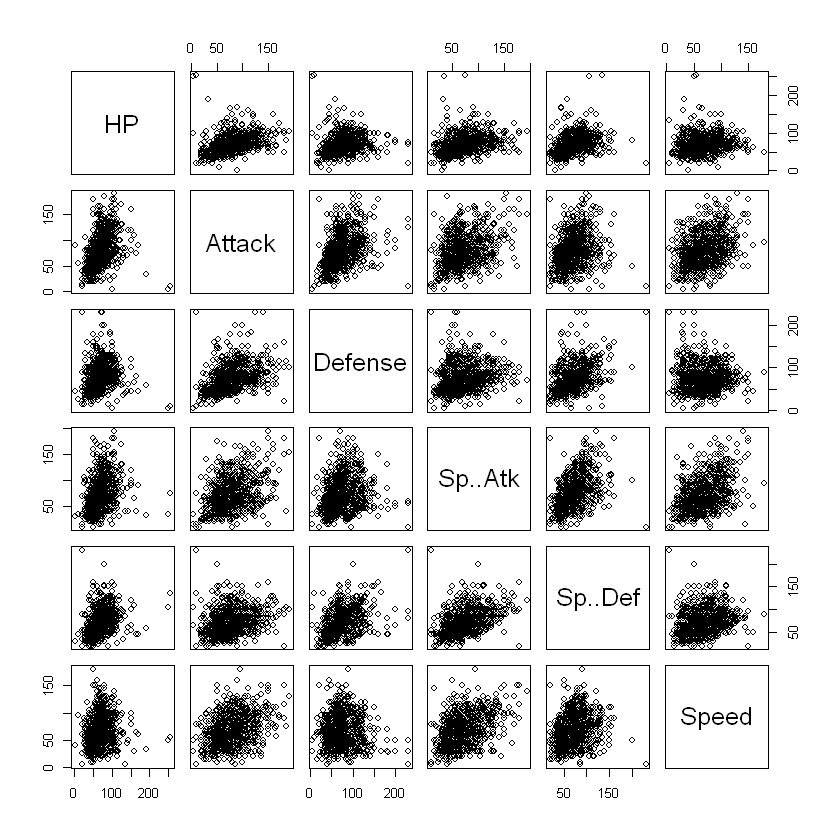

In [6]:
plot(pkm2)

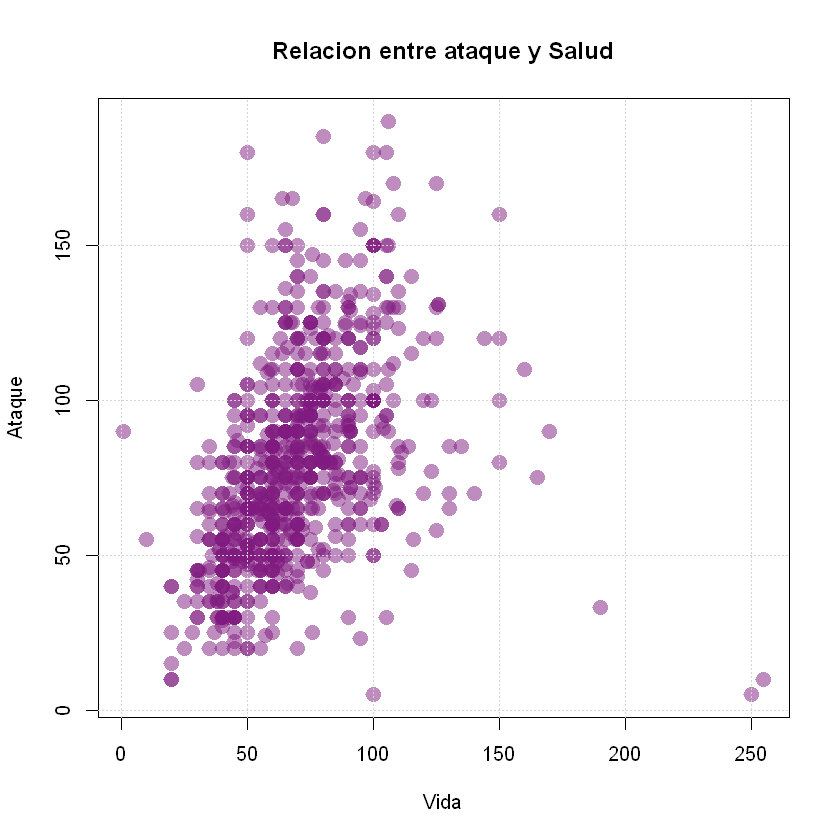

In [82]:
## Al parecer si hay cierta relacion entre ataque y salud

# png("imagenes/Pkm.png")

plot(pkm$HP, pkm$Attack, lwd = 7, col = rgb(.5, .1, .5, .5), main = "Relacion entre ataque y Salud",
    xlab = "Vida", ylab = "Ataque")
grid()

# dev.off()

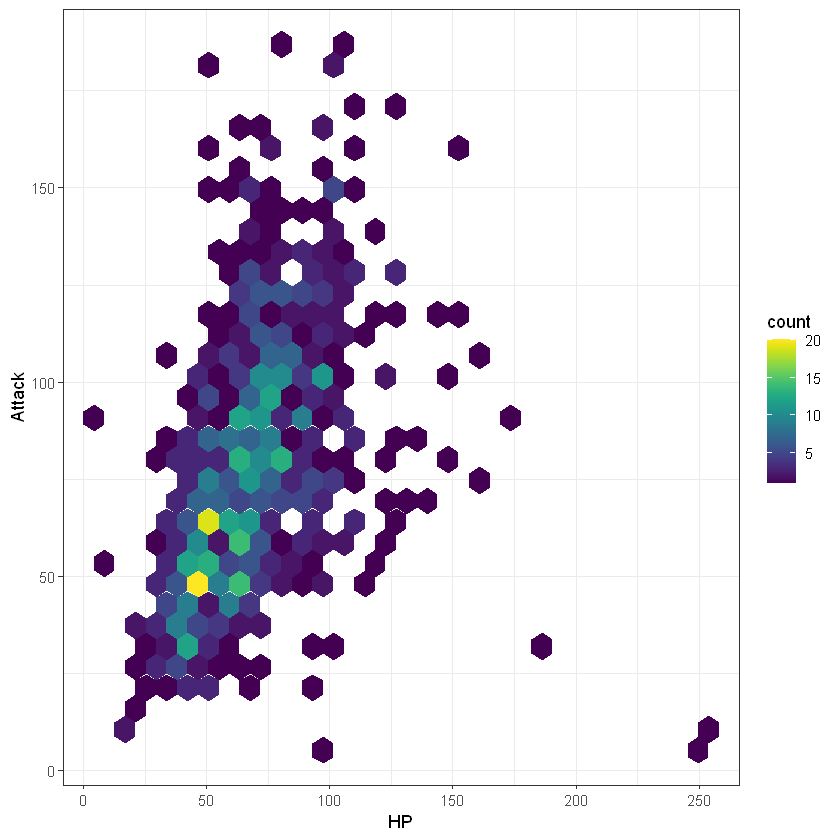

In [30]:
pkm |> ggplot(aes(x = HP, y = Attack)) + geom_hex() +
        theme_bw() + scale_fill_viridis()

In [32]:
"hola" %in% "holaaa"

[1] FALSE

In [35]:
grep('h', c("hola", "doha"))

[1] 1 2

In [64]:
head (pkm[grep("Mega", pkm$Name), ] )

,X,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
4,4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
8,8,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
9,9,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
13,13,9,BlastoiseMega Blastoise,Water,,630,79,103,120,135,115,78,1,False
20,20,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
24,24,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False


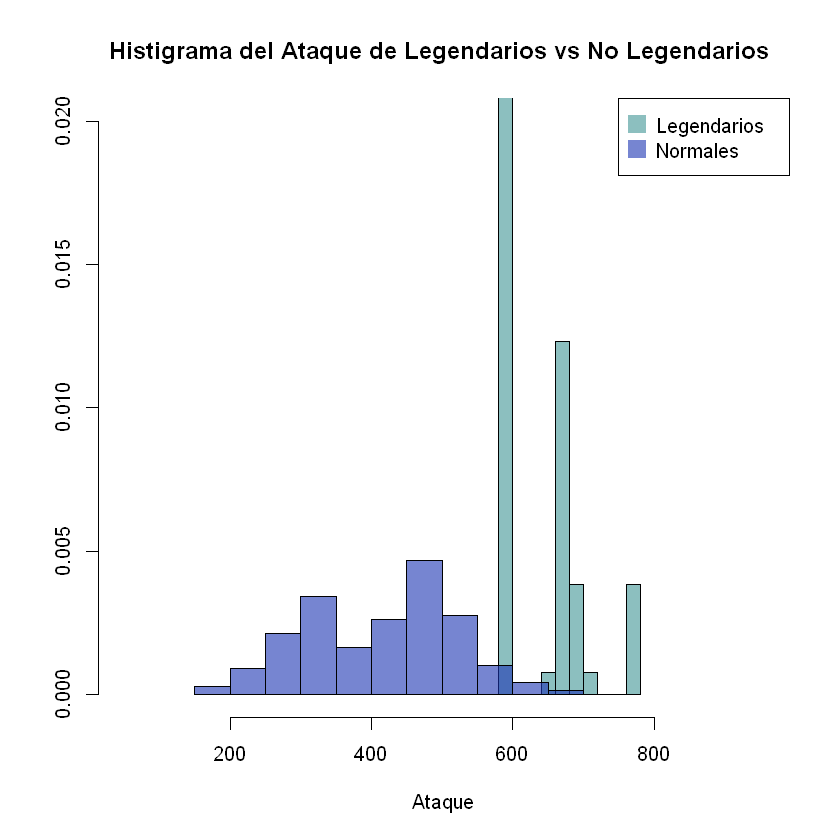

In [74]:
## Crear un histograma que muestre la distribucion del ataque de los pokemon que son legendarios vs No legendarios

## primera distribucion
hist(pkm$Total[ pkm$Legendary == 'True' ], 
    main = "Histigrama del Ataque de Legendarios vs No Legendarios ", xlab = "Ataque",ylab = "",
    xlim = c(50, 955),ylim = c(0,0.02),
    col = rgb(.1, .5, .5, .5), prob = T)

## segunda distribucion 
hist(pkm$Total[ pkm$Legendary == 'False' ], xlab = "Ataque",
    col = rgb(.1, .2, .7, .6), add = T, prob = T)

## agrgar etiqueta
legend("topright", legend=c("Legendarios","Normales"), col=c(rgb(.1, .5, .5, .5), 
     rgb(.1, .2, .7, .6)), pt.cex=2, pch=15 )

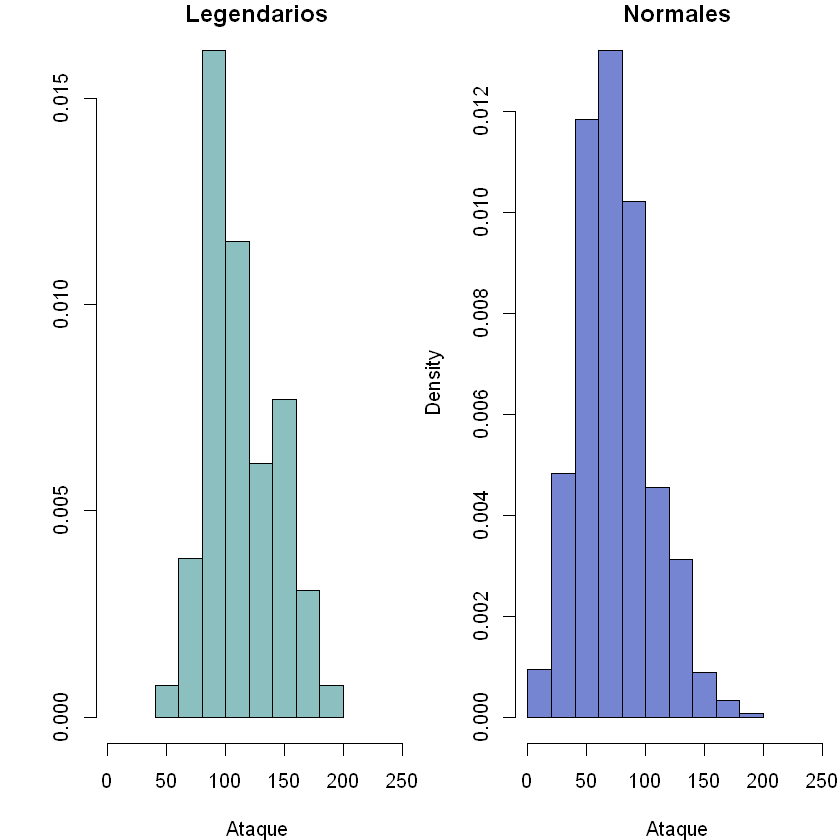

In [76]:
# png("imagenes/pokemon.png")
## En ocaciones es mejor separalos 

par( mfrow=c(1,2), mar=c(4,4,1,0) )

hist(pkm$Attack[ pkm$Legendary == 'True' ], 
    main = "Legendarios", xlab = "Ataque",ylab = "",xlim = c(0, 255),
    col = rgb(.1, .5, .5, .5), prob = T)

## segunda distribucion 
hist(pkm$Attack[ pkm$Legendary == 'False' ], main = "Normales" , xlab = "Ataque",xlim = c(0, 255),
    col = rgb(.1, .2, .7, .6), prob = T)
# dev.off()